# Project 0: Inaugural Project
> Group **"A J"**


# Table of Contents


[Table of Contents](#Table-of-contents)

[Imports](#Imports)

1. [Illustrating the set](#1.-Illustrating-the-Set)

2. [Calculating the error in the MCC](#2.-Calculating-the-Error-in-the-MCC)

3. [Finding the Market Clearing Price](#3.-Finding-the-Market-Clearing-Price)

4. [Allocations from prices](#4-Allocations-from-prices)
* a. Finding allocation with price in P_1
* b. Finding allocation with any price > 0

5. [Allocations with restrictions](#5-Allocations-with-restrictions)
* a. Finding allocation with choice restricted to C
* b. Finding allocation with no further restrictions

6. [Further allocations](#6-Further-Allocations)
* a. Finding allocation with social planner
* b. Illustrating allocations

7. [Drawing Set W](#7.-Drawing-Set-W)

8. [Finding the Market Equilibrium Allocation](#8.-Finding-the-Market-Equilibrium-Allocation)

[Conclusion](#Conclusion)

# Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
from inauguralproject import ExchangeEconomyClass

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

model = ExchangeEconomyClass()
par = model.par


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Illustrating the Set

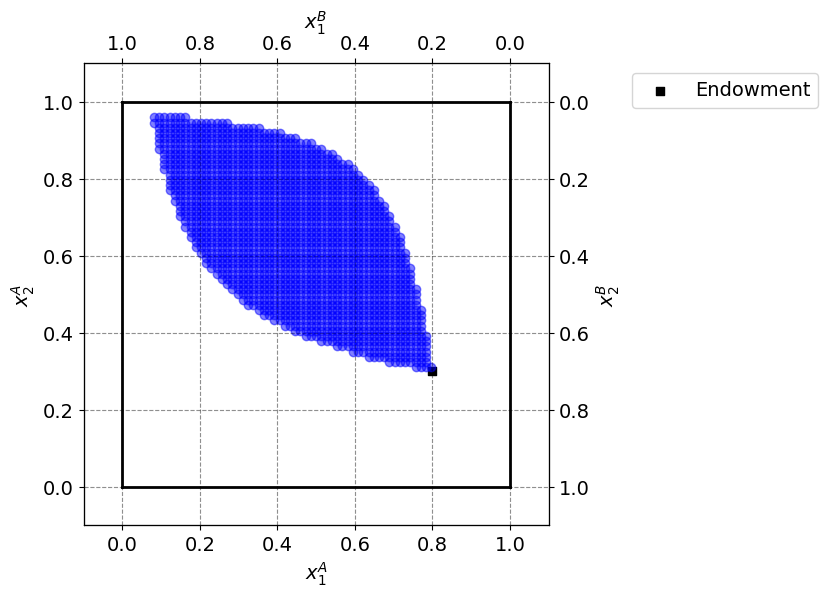

In [26]:
### Figure set up ###
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(model.par.w1A,model.par.w2A,marker='s',color='black',label='Endowment')

# Limits
ax_A.plot([0,model.par.w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,model.par.w1bar],[model.par.w2bar,model.par.w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,model.par.w2bar],lw=2,color='black')
ax_A.plot([model.par.w1bar,model.par.w1bar],[0,model.par.w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, model.par.w1bar + 0.1])
ax_A.set_ylim([-0.1, model.par.w2bar + 0.1])    
ax_B.set_xlim([model.par.w1bar + 0.1, -0.1])
ax_B.set_ylim([model.par.w2bar + 0.1, -0.1])

### Pareto improvements ###

# N is the amount of steps from 0 to 1 for the goods
N = 75

# Define an empty list that will hold the pareto improvements
pareto_improvements = []


# Collecting Pareto improvements using a for loop
for x1A in np.linspace(0, 1, N):
    for x2A in np.linspace(0, 1, N):
        x1B = 1 - x1A
        x2B = 1 - x2A
        # Append pareto improvements to the empty list
        if model.utility_A(x1A, x2A) >= model.baseline_utility_A() and model.utility_B(x1B, x2B) >= model.baseline_utility_B():
            pareto_improvements.append((x1A, x2A))

### Plotting Pareto improvements ###
for x1A, x2A in pareto_improvements:
    ax_A.plot(x1A, x2A, 'bo', alpha=0.5)

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0))

plt.show()

# 2. Calculating the error in the MCC

In [27]:
### Finding epsilon for all given values with loop ###
N = 75

# Define an empty list that will store the errors
error = []

# Defining the p1 sets
p1_values = np.linspace(0.5, 2.5, N)

# Store the pairs of errors with the corresponding p1's
for p1 in p1_values:
    eps = model.check_market_clearing(p1)
    error.append((p1, eps))  # Storing both p1 and eps together

# Function to print the first three and last elements of the error list with corresponding p1
def print_selected_errors(errors):
    print("First 3 and last errors with corresponding p1:")
    # Print first three errors
    for i in range(3):
        p1, (eps1, eps2) = errors[i]
        print(f"p1 = {p1:.3f}: eps1 = {eps1:.3f}, eps2 = {eps2:.3f}")

    print("...")

    # Print last error
    p1, (eps1, eps2) = errors[-1]
    print(f"p1 = {p1:.3f}: eps1 = {eps1:.3f}, eps2 = {eps2:.3f}")

# Call the function to print the selected errors
print_selected_errors(error)

First 3 and last errors with corresponding p1:
p1 = 0.500: eps1 = 0.533, eps2 = -0.267
p1 = 0.527: eps1 = 0.475, eps2 = -0.250
p1 = 0.554: eps1 = 0.423, eps2 = -0.234
...
p1 = 2.500: eps1 = -0.373, eps2 = 0.933


# 3. Finding the Market Clearing Price

In [28]:
# Define initial guess for the price for the optimizer
guess = 2

# Define the bounds for the optimizer
bounds = [(0.001, None)]

# Find the market clearing price by minimizing the sum of errors using an optimizer
optimal_p1_3 = minimize(model.error_sum, guess, bounds=bounds)

print(f"Market Clearing Price for p1: {optimal_p1_3.x[0]:.3f}")
print(f"Check if sum of errors is minimized: {optimal_p1_3.fun:.3f}")

Market Clearing Price for p1: 0.944
Check if sum of errors is minimized: 0.000


# 4. Allocations from prices

* a. Finding allocation with price in $\mathcal{P}_1$

In [29]:
N = 75
p1 = np.linspace(0.5, 2.5, N)

# Initialize variables to store the maximum utility and the corresponding p1
max_utility = float('-inf')
optimal_p1_4a = None

# Iterate over each p1 to find the one that maximizes utility for consumer A
for p1_i in p1:
    utility = -model.utility_A_p1(p1_i)
    if utility > max_utility:
        max_utility = utility
        optimal_p1_4a = p1_i

# Once the optimal p1 is found, calculate the optimal consumptions
result_4a_x1B, result_4a_x2B = model.demand_B(optimal_p1_4a)
result_4a_x1A, result_4a_x2A = 1 - result_4a_x1B, 1 - result_4a_x2B

# Print the results
print(f"Optimal p1: {optimal_p1_4a:.3f}")
print(f"Optimal Consumption for A:")
print(f"x1A = {result_4a_x1A:.3f}, x2A = {result_4a_x2A:.3f}")
print(f"Resulting Consumption for B:")
print(f"x1B = {result_4a_x1B:.3f}, x2B = {result_4a_x2B:.3f}")
print(f"Consumer A utility: {max_utility:.3f}")
print(f"Consumer B utility: {model.utility_B(result_4a_x1B,result_4a_x2B):.3f}")
print(f"Check if sum is 1 for good 1: {result_4a_x1A + result_4a_x1B:.3f}")
print(f"Check if sum is 1 for good 2: {result_4a_x2A + result_4a_x2B:.3f}")


Optimal p1: 1.905
Optimal Consumption for A:
x1A = 0.622, x2A = 0.640
Resulting Consumption for B:
x1B = 0.378, x2B = 0.360
Consumer A utility: 0.634
Consumer B utility: 0.372
Check if sum is 1 for good 1: 1.000
Check if sum is 1 for good 2: 1.000


* b. Finding allocation with any price $p_1> 0$

In [30]:
# Initial guess for p1
initial_guess_p1 = [1.0]

# Bounds for p1 - ensuring p1 is greater than 0
bounds = [(0.001, None)]

# Maximizing the utility (negative in method) of consumer A using an optimizer
result = minimize(model.utility_A_p1, initial_guess_p1, bounds=bounds)

# Extracting the optimal p1 from the result
optimal_p1b = result.x[0]  # The optimal price p1
optimal_value = -result.fun  # The maximum utility value of A, negate because we minimized the negative utility

# Consumer B's demand at optimal price
result_4b_x1B, result_4b_x2B = model.demand_B(optimal_p1b)

# Consumer A's consumption after B's consumption at optimal price
result_4b_x1A, result_4b_x2A = 1 - result_4b_x1B, 1 - result_4b_x2B

# Print results
print(f"Optimal p1: {optimal_p1b:.3f}")
print(f"Maximized Utility for A: {optimal_value:.3f}")
print(f"Optimal Consumption for A:")
print(f"x1A = {result_4b_x1A:.3f}, x2A = {result_4b_x2A:.3f}")
print(f"Optimal Consumption for B:")
print(f"x1B = {result_4b_x1B:.3f}, x2B = {result_4b_x2B:.3f}")
print(f"Check if sum is 1 for good 1: {result_4b_x1A + result_4b_x1B:.3f}")
print(f"Check if sum is 1 for good 2: {result_4b_x2A + result_4b_x2B:.3f}")


Optimal p1: 1.899
Maximized Utility for A: 0.634
Optimal Consumption for A:
x1A = 0.621, x2A = 0.640
Optimal Consumption for B:
x1B = 0.379, x2B = 0.360
Check if sum is 1 for good 1: 1.000
Check if sum is 1 for good 2: 1.000


# 5. Allocations with restrictions

* a. Finding allocation with choice restricted to $\mathcal{C}$

In [31]:
# Constraints ensuring both A and B are at least as well off as with their initial endowments
constraints = (
    {'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - model.baseline_utility_A()},
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.baseline_utility_B()}
)

# Bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess
initial_guess = [model.par.w1A, model.par.w2A]

# Solve the optimization problem
result = minimize(model.objective_function, initial_guess, bounds=bounds, constraints=constraints)

# Extracting the optimal allocation for A
result_5a_x1A, result_5a_x2A = result.x

# Calculating B's consumption based on A's optimal allocation
result_5a_x1B, result_5a_x2B = 1 - result_5a_x1A, 1 - result_5a_x2A

# Output results
print(f"Optimal Allocation for A:")
print(f"x1A = {result_5a_x1A:.3f}, x2A = {result_5a_x2A:.3f}")
print(f"Optimal Allocation for B:")
print(f"x1B = {result_5a_x1B:.3f}, x2B = {result_5a_x2B:.3f}")
print(f"Check if sum is 1 for good 1: {result_5a_x1A + result_5a_x1B:.3f}")
print(f"Check if sum is 1 for good 2: {result_5a_x2A + result_5a_x2B:.3f}")


Optimal Allocation for A:
x1A = 0.576, x2A = 0.844
Optimal Allocation for B:
x1B = 0.424, x2B = 0.156
Check if sum is 1 for good 1: 1.000
Check if sum is 1 for good 2: 1.000


* b. Finding allocation with no further restrictions

In [32]:
# Constraint function
def constraint_function(x):
    x1A, x2A = x

    return model.utility_B(1 - x1A, 1 - x2A) - model.utility_B(model.par.w1B, model.par.w1B)

# Define constraints using a dictionary
constraints = ({'type': 'eq', 'fun': constraint_function})

# Bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess
initial_guess = [model.par.w1A, model.par.w2A]

# Solve the optimization problem
result = minimize(model.objective_function, initial_guess, bounds=bounds, constraints=constraints)

# Extracting the optimal allocation for A
result_5b_x1A, result_5b_x2A = result.x

# Calculating B's consumption based on A's optimal allocation
result_5b_x1B, result_5b_x2B = 1 - result_5b_x1A, 1 - result_5b_x2A

# Output results
print(f"Optimal Allocation for A:")
print(f"x1A = {result_5b_x1A:.3f}, x2A = {result_5b_x2A:.3f}")
print(f"Optimal Allocation for B:")
print(f"x1B = {result_5b_x1B:.3f}, x2B = {result_5b_x2B:.3f}")
print(f"Check if sum is 1 for good 1: {result_5b_x1A + result_5b_x1B:.3f}")
print(f"Check if sum is 1 for good 2: {result_5b_x2A + result_5b_x2B:.3f}")

Optimal Allocation for A:
x1A = 0.708, x2A = 0.906
Optimal Allocation for B:
x1B = 0.292, x2B = 0.094
Check if sum is 1 for good 1: 1.000
Check if sum is 1 for good 2: 1.000


# 6. Further Allocations

* a. Finding allocation with social planner

In [33]:
# No constraints
constraints = ()

# Limiting x1a and x2a
bounds = [(0, 1), (0, 1)]

# Initial guess
initial_guess = [0.7, 0.3]

# Optimizing
result = minimize(model.aggregate_utility_objective, initial_guess, bounds=bounds, constraints=constraints)

# Reading the optimal allocation for A
result_6a_x1A, result_6a_x2A = result.x

# Calculating B's consumption based on A's optimal allocation
result_6a_x1B, result_6a_x2B = 1 - result_6a_x1A, 1 - result_6a_x2A

# Output results
print(f"Optimal Allocation for A:")
print(f"x1A = {result_6a_x1A:.3f}, x2A = {result_6a_x2A:.3f}")
print(f"Optimal Allocation for B:")
print(f"x1B = {result_6a_x1B:.3f}, x2B = {result_6a_x2B:.3f}")
print(f"Check if sum is 1 for good 1: {result_6a_x1A + result_6a_x1B:.3f}")
print(f"Check if sum is 1 for good 2: {result_6a_x2A + result_6a_x2B:.3f}")

Optimal Allocation for A:
x1A = 0.333, x2A = 0.667
Optimal Allocation for B:
x1B = 0.667, x2B = 0.333
Check if sum is 1 for good 1: 1.000
Check if sum is 1 for good 2: 1.000


* b. Illustrating allocations

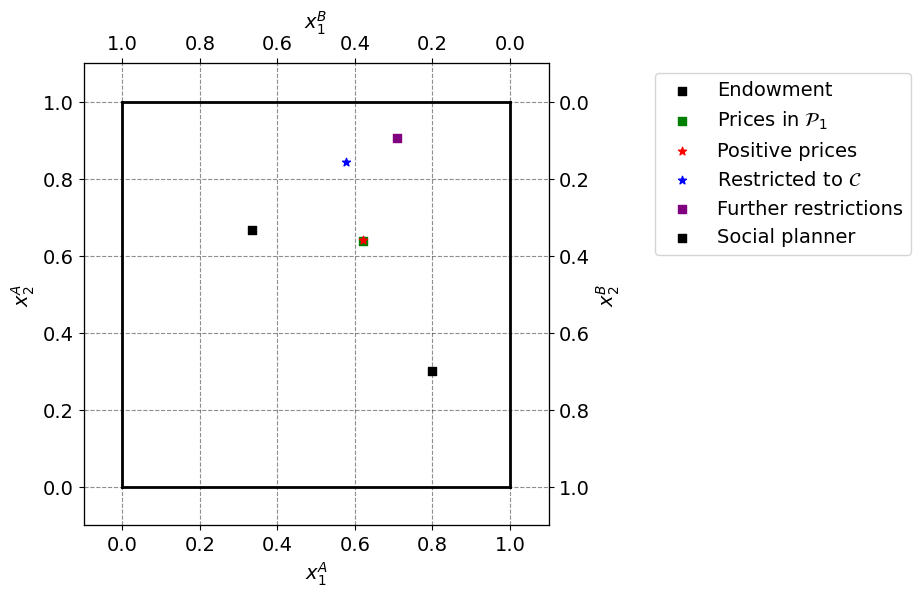

In [34]:
### Figure set up ###
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(0.8,0.3,marker='s',color='black',label='Endowment')

# Limits
ax_A.plot([0,model.par.w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,model.par.w1bar],[model.par.w2bar,model.par.w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,model.par.w2bar],lw=2,color='black')
ax_A.plot([model.par.w1bar,model.par.w1bar],[0,model.par.w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, model.par.w1bar + 0.1])
ax_A.set_ylim([-0.1, model.par.w2bar + 0.1])    
ax_B.set_xlim([model.par.w1bar + 0.1, -0.1])
ax_B.set_ylim([model.par.w2bar + 0.1, -0.1])

### Illustrating the 6 different allocations in an Edgeworth-box ###
ax_A.scatter(result_4a_x1A,result_4a_x2A,marker='s',color='green',label='Prices in $\mathcal{P}_1$')

ax_A.scatter(result_4b_x1A,result_4b_x2A,marker='*',color='red',label='Positive prices')

ax_A.scatter(result_5a_x1A,result_5a_x2A,marker='*',color='blue',label='Restricted to $\mathcal{C}$')

ax_A.scatter(result_5b_x1A,result_5b_x2A,marker='s',color='purple',label='Further restrictions')

ax_A.scatter(result_6a_x1A,result_6a_x2A,marker='s',color='black',label='Social planner')

ax_A.legend(frameon=True,loc='best',bbox_to_anchor=(1.8,1.0))

plt.show()

# 7. Drawing Set $\mathcal{W}$

In [35]:
# Number of elements to draw
N_elements = 50

# Drawing 50 elements from a uniform distribution for w1A and w2A
w1A_samples = np.random.uniform(0, 1, N_elements)
w2A_samples = np.random.uniform(0, 1, N_elements)

# Combining the samples into a set W with 50 elements
w = list(zip(w1A_samples, w2A_samples))

# Function to print the first three and last element of the set W
def print_sample_set(w):
    # Print the first three elements
    for element in w[:3]:
        print(f"({element[0]:.3f}, {element[1]:.3f})")
    print("...")

    # Print the last element
    last_element = w[-1]
    print(f"({last_element[0]:.3f}, {last_element[1]:.3f})")

# Call the function to print the elements
print_sample_set(w)

(0.405, 0.671)
(0.637, 0.846)
(0.828, 0.026)
...
(0.239, 0.597)


# 8. Finding the Market Equilibrium Allocation

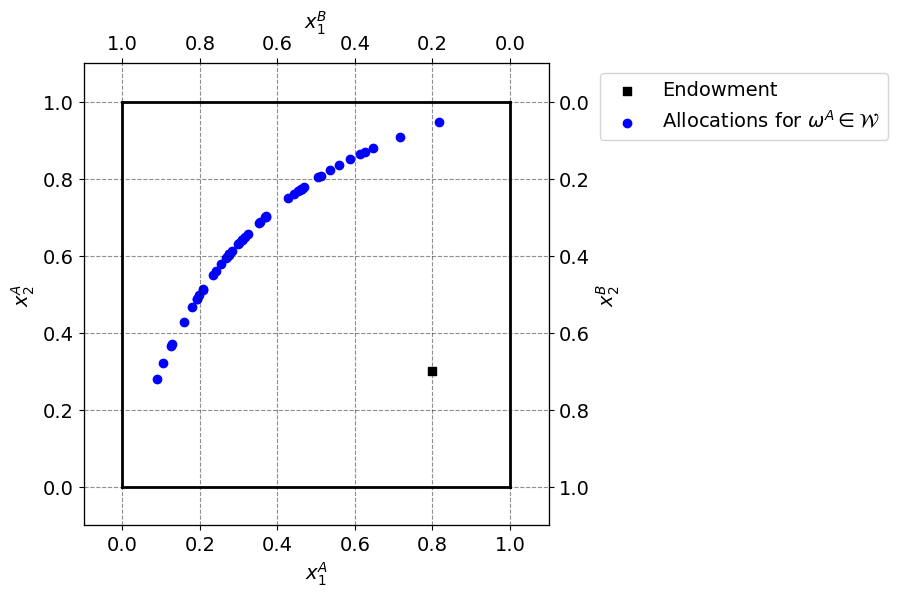

In [36]:
# Initialize a list to store the market-clearing prices and allocations
market_clearing_prices = []
allocations_A = []
allocations_B = []

# Loop over each endowment pair in W
for w1A, w2A in w:
    # Call the method to find the market-clearing price
    p1 = model.find_market_clearing_price(w1A, w2A)
    
    # Calculate demands at the market-clearing price
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)
    
    # Store the price and allocations
    market_clearing_prices.append(p1)
    allocations_A.append((x1A, x2A))
    allocations_B.append((x1B, x2B))


# The 'market_clearing_prices' list now contains the market-clearing prices for each endowment pair in W
# 'allocations_A' and 'allocations_B' contain the corresponding allocations for consumers A and B

### Plotting the allocations ###

par = model.par

# Total endowment
w1bar = par.w1bar
w2bar = par.w2bar

# Figure set up
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A's and B's endowment
ax_A.scatter(0.8, 0.3, marker='s', color='black', label='Endowment')

# Limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Plotting the allocations

ax_A.scatter(*zip(*allocations_A), marker='o', color='blue', label='Allocations for $\omega^A \in \mathcal{W}$')

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.75, 1.0))

# Display the plot
plt.show()



# Conclusion

This notebook systematically explores the determination of market equilibrium and allocation efficiencies within the given economic model, using computational techniques for analysis and visualization.